In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_data = pd.read_csv('netflix1.csv')
netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
netflix_data.shape

(8790, 10)

In [5]:
netflix_data = netflix_data.drop_duplicates()

In [10]:
freq = netflix_data['type'].value_counts()
freq

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

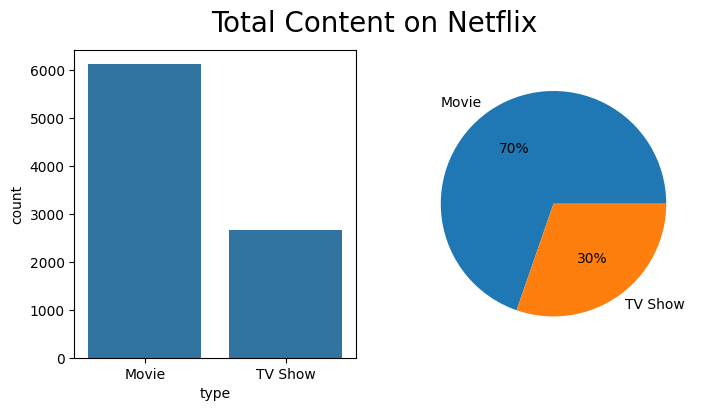

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.countplot(netflix_data, x=netflix_data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.show()

In [15]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [16]:
netflix_data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [17]:
ratings = netflix_data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

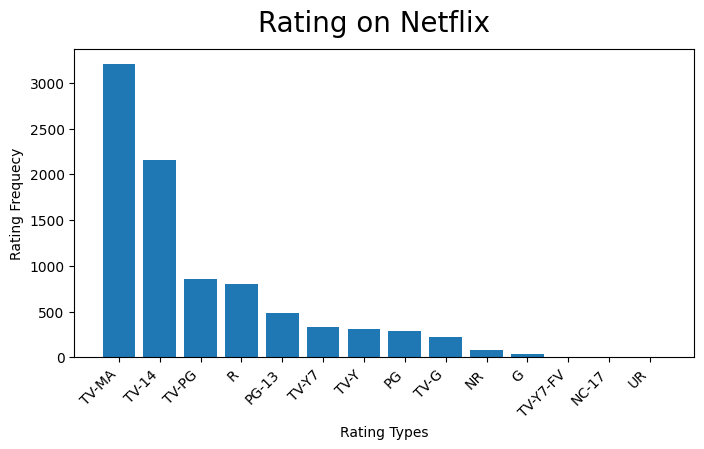

In [49]:
plt.figure(figsize=(8, 4))
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequecy")
plt.suptitle("Rating on Netflix", fontsize=20)
plt.show()

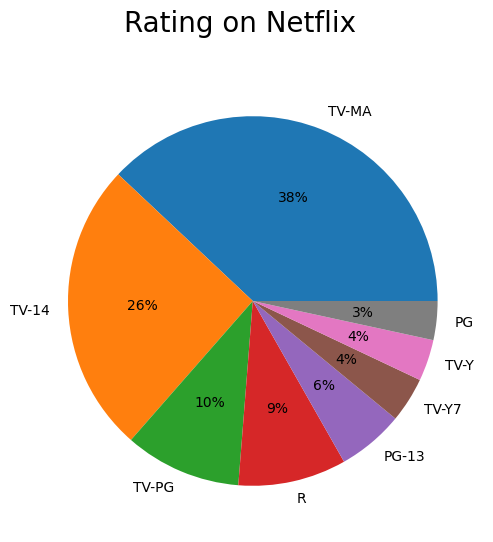

In [51]:
plt.figure(figsize=(10, 6))
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()

In [22]:
# convert column date_added to datetime.
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [23]:
netflix_data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [24]:
netflix_data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Luxembourg           1
Senegal              1
Belarus              1
Puerto Rico          1
Cyprus               1
Name: count, Length: 86, dtype: int64

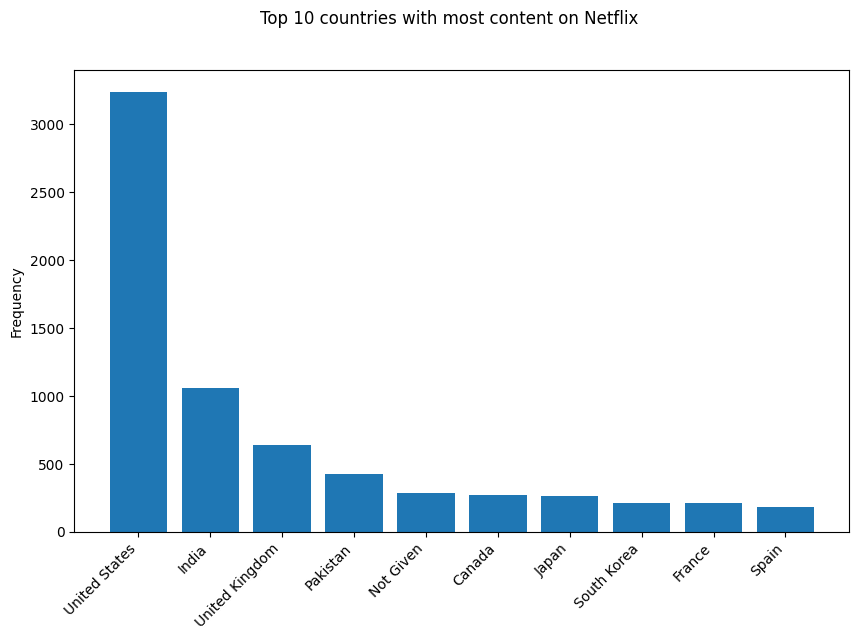

In [29]:
# Top 10 countries with most content on Netflix

top_10_countries = netflix_data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(10,6))
plt.bar(top_10_countries['country'], top_10_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.suptitle('Top 10 countries with most content on Netflix')
plt.show()



In [30]:
netflix_data['year'] = netflix_data['date_added'].dt.year
netflix_data['month'] = netflix_data['date_added'].dt.month
netflix_data['day'] = netflix_data['date_added'].dt.day

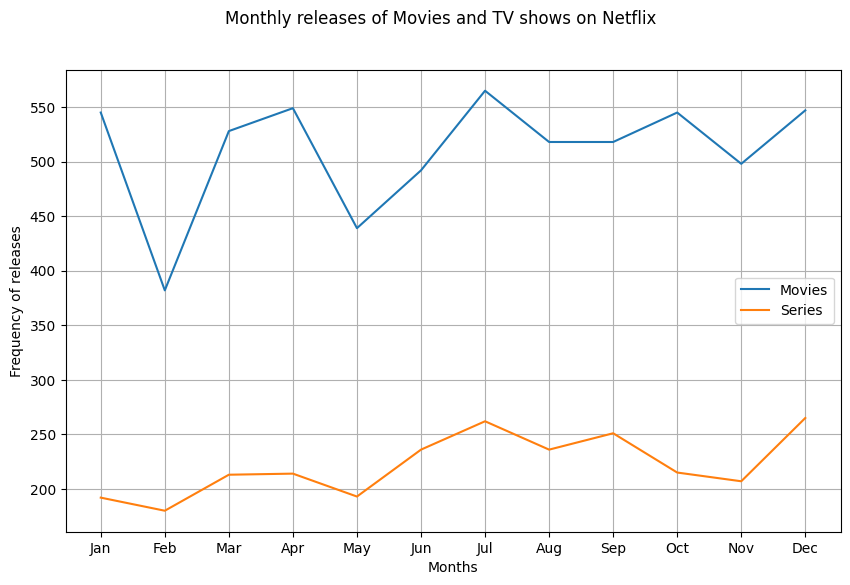

In [35]:
# Monthly releases of Movies and TV shows on Netflix

monthly_movie_release = netflix_data[netflix_data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_series_release = netflix_data[netflix_data['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')
plt.xlabel('Months')
plt.ylabel('Frequency of releases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle('Monthly releases of Movies and TV shows on Netflix')
plt.show()

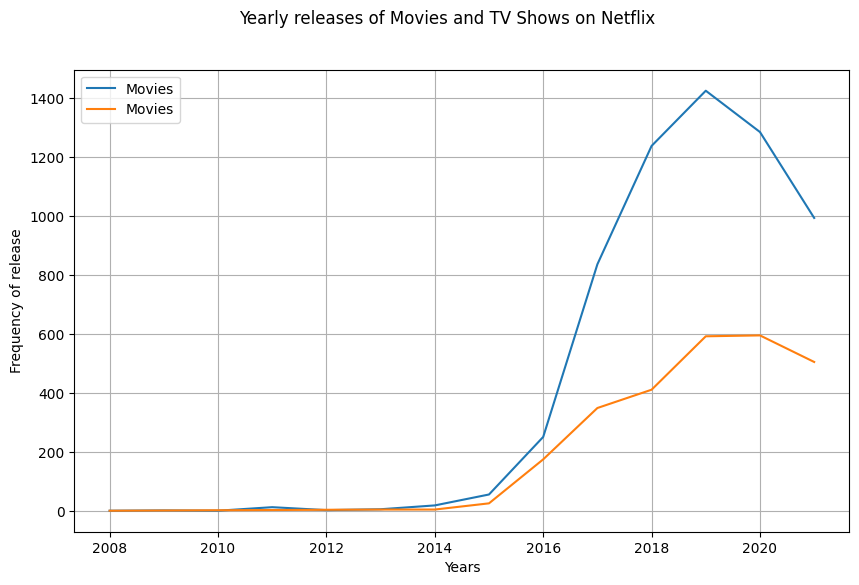

In [36]:
# Yearly releases of Movies and TV Shows on Netflix 

yearly_movies_releases = netflix_data[netflix_data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_series_releases = netflix_data[netflix_data['type'] == 'TV Show']['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_movies_releases.index, yearly_movies_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='Movies')
plt.xlabel('Years')
plt.ylabel('Frequency of release')
plt.grid(True)
plt.suptitle('Yearly releases of Movies and TV Shows on Netflix ')
plt.legend()
plt.show()

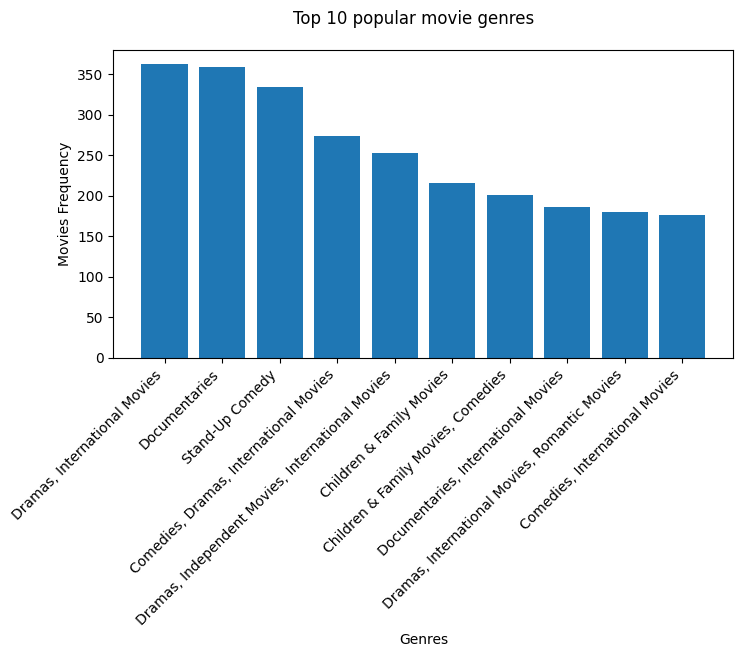

In [52]:
# Top 10 popular movie genres

popular_movie_genre = netflix_data[netflix_data['type'] == 'Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 4))
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle("Top 10 popular movie genres")
plt.show()

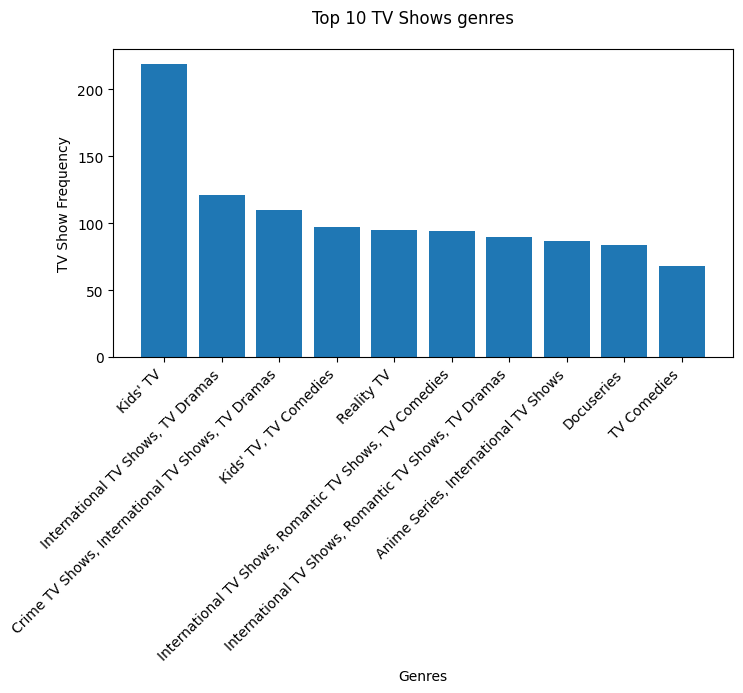

In [53]:
# Top 10 TV Shows genres

popular_series_genre = netflix_data[netflix_data['type'] == 'TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 4))
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('TV Show Frequency')
plt.suptitle('Top 10 TV Shows genres')
plt.show()

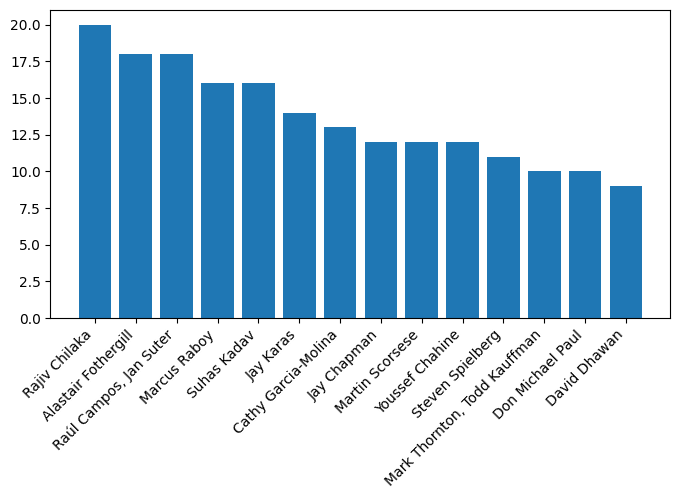

In [54]:
# Top 15 directors across Netflix with hoigh frequency of movies and shows.

directors = netflix_data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

plt.figure(figsize=(8, 4))
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')
plt.show()